## Import Libraries & Loading Dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("bmi.csv")
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


# EDA

([<matplotlib.patches.Wedge at 0x1ddd1ff2490>,
 [Text(-0.034551802045584716, 1.0994572174374968, 'Male'),
  Text(0.03455180204558458, -1.0994572174374968, 'Female')],
 [Text(-0.018846437479409842, 0.5997039367840891, '51.00'),
  Text(0.01884643747940977, -0.5997039367840891, '49.00')])

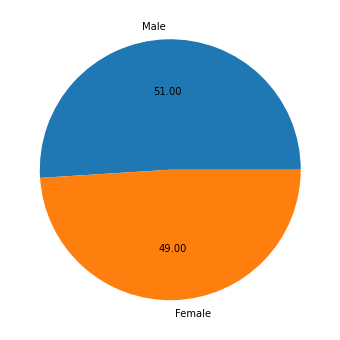

In [3]:
plt.figure(figsize=(6,6))
labels = [label for label in data["Gender"].unique()]
plt.pie(data["Gender"].value_counts(),labels=labels,autopct='%.2f')

array([[<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>],
       [<AxesSubplot:title={'center':'Index'}>, <AxesSubplot:>]],
      dtype=object)

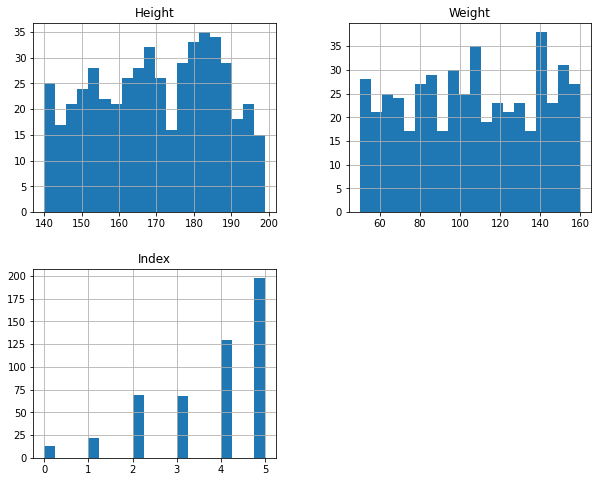

In [4]:
data.hist(figsize=(10,8),bins=20)

<AxesSubplot:>

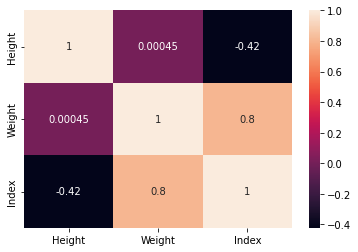

In [5]:
sns.heatmap(data.corr(),annot=True)

# Preprocessing

## Convert categorical to numerical
### LabelEncoder

In [6]:
LE = LabelEncoder()
data["Gender"] = LE.fit_transform(data["Gender"])

In [7]:
X = data.drop("Index",axis=1).values
Y = data.Index.values

In [8]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Model

### KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier(n_neighbors=5,weights="distance",n_jobs=-1)
knn.fit(x_train,y_train)
predict_knn = knn.predict(x_test)

In [10]:
print(metrics.classification_report(y_test,predict_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        18
           3       0.89      1.00      0.94         8
           4       0.96      0.87      0.91        30
           5       0.93      0.97      0.95        39

    accuracy                           0.95       100
   macro avg       0.96      0.97      0.97       100
weighted avg       0.95      0.95      0.95       100



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


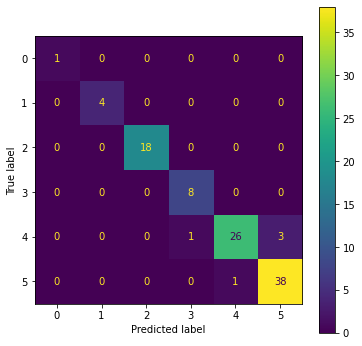

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))
metrics.plot_confusion_matrix(knn,x_test,y_test,ax=ax)

### GBoostingClassifier

In [12]:
Gboost = GradientBoostingClassifier(learning_rate=0.11,random_state=0)
Gboost.fit(x_train,y_train)
predict_gb = Gboost.predict(x_test)

In [13]:
print(metrics.classification_report(y_test,predict_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        18
           3       0.80      1.00      0.89         8
           4       0.92      0.80      0.86        30
           5       0.90      0.95      0.92        39

    accuracy                           0.92       100
   macro avg       0.94      0.96      0.95       100
weighted avg       0.92      0.92      0.92       100



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


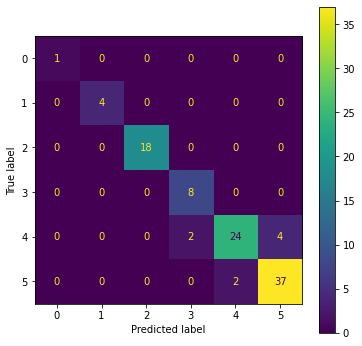

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))
metrics.plot_confusion_matrix(Gboost,x_test,y_test,ax=ax)

In [15]:
acc = [{"Algorithm":"KNeighbors",'Accuracy': metrics.accuracy_score(y_test,predict_knn),'Precision': metrics.precision_score(y_test,predict_knn,average='macro'),'Recall': metrics.recall_score(y_test,predict_knn,average='macro'),'F1-score': metrics.f1_score(y_test,predict_knn,average='macro')},
        {"Algorithm":"Gboost",'Accuracy': metrics.accuracy_score(y_test,predict_gb),'Precision': metrics.precision_score(y_test,predict_gb,average='macro'),'Recall': metrics.recall_score(y_test,predict_gb,average='macro'),'F1-score': metrics.f1_score(y_test,predict_gb,average='macro')},
       ] 

In [16]:
accurac = pd.DataFrame.from_dict(acc)
accurac

,Algorithm,Accuracy,Precision,Recall,F1-score
0,KNeighbors,0.95,0.963114,0.973504,0.967243
1,Gboost,0.92,0.937586,0.958120,0.945172
